# **Project 2 Report**

Jason Brown

CS458

In [1]:
# Import all libraries and packages
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.datasets import fetch_20newsgroups
import random
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
#Load the iris dataset
iris = datasets.load_iris()

## **P2-1. Decision Tree**

**(a) Develop a decision tree based classifier to classify the 3 different types  of Iris (Setosa, Versicolour, and Virginica).**

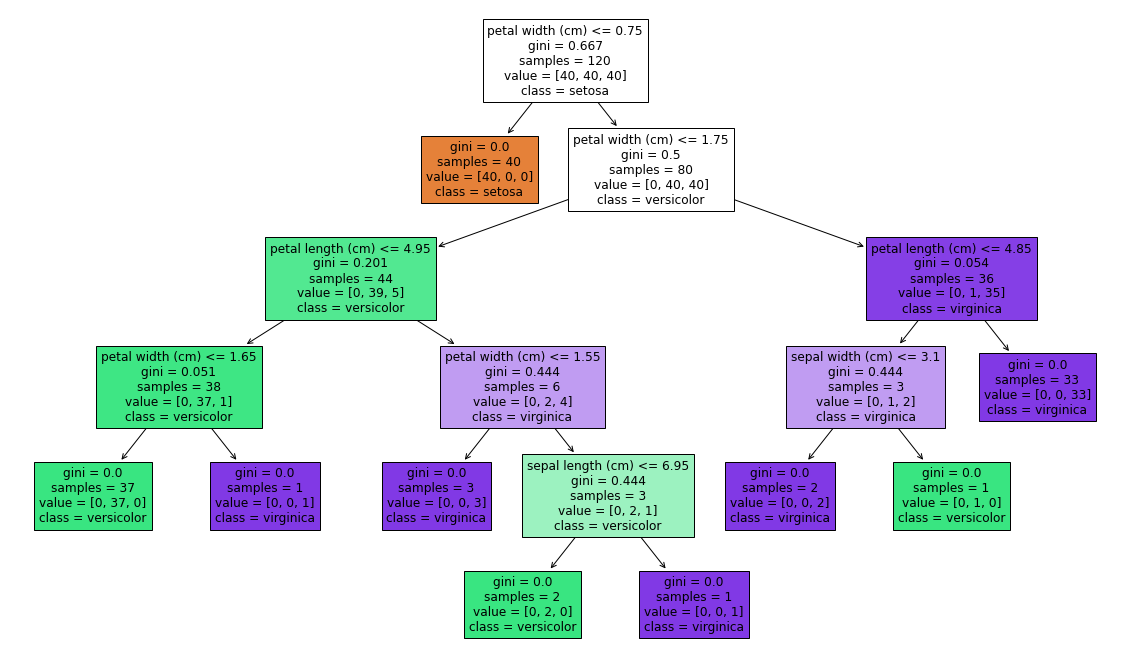

In [9]:
#### PART 1-A
# Classifier initialization and kfold split
skf = StratifiedKFold(n_splits = 5)
clf = DecisionTreeClassifier()
preds = []
xTrains = []
yTrains = []

# for each sample of split, append new data, fit classifier, make accuracy prediction, and record training data
for train_index, test_index in skf.split(iris.data, iris.target):
    X_train, X_test, y_train, y_test = iris.data[train_index], iris.data[test_index], iris.target[train_index], iris.target[test_index]
    clf.fit(X_train, y_train)
    xTrains.append(X_train)
    yTrains.append(y_train)
    y_pred = clf.predict(X_test)
    preds.append(y_pred)

# Create decision tree plot
plt.figure(figsize = (20,12))
plot_tree(clf, feature_names = iris.feature_names, class_names = iris.target_names, filled=True)
plt.show()

Using 5-fold cross validation to train decision tree. Using 10 samples from each test set and 40 samples from each Iris type. This is the default decision tree with no restricting parameters.

**(b) Optimize the parameters of your decision tree to maximize the classification accuracy. Show the confusion matrix of your decision tree. Plot your decision tree.**


Best Score | Best Leaf | Best Split | Best Feat | Best Depth
1.0        | 9         | 8          | 2         | 9

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


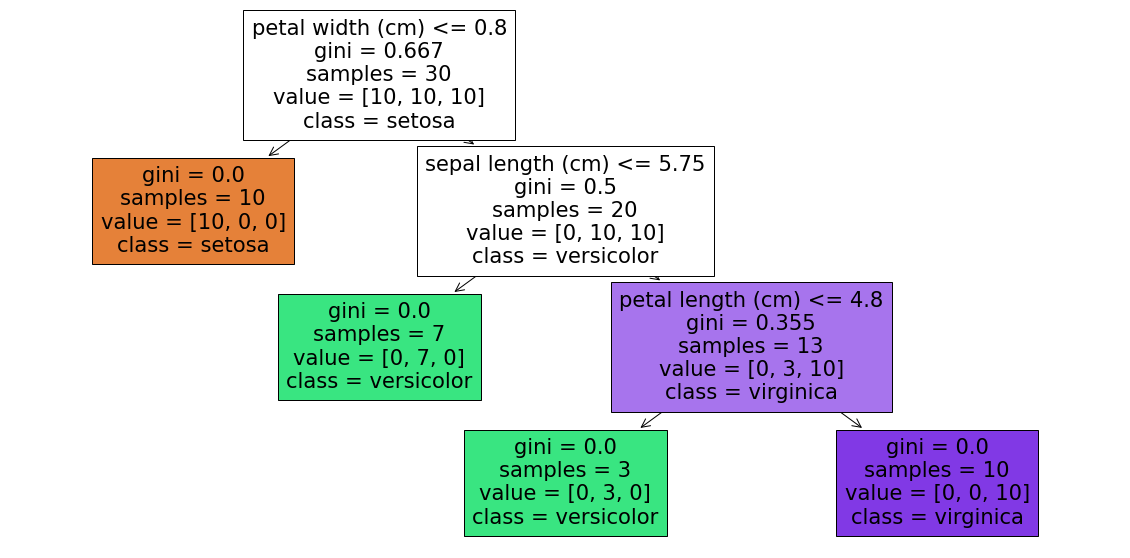

In [10]:
#### PART 1-B
# Initialize and declare parameters to test
max_depth = [1,2,3,4,5,6,7,8,9,10]
min_sample = [1,2,3,4,5,6,7,8,9,10]
min_split = [2,3,4,5,6,7,8,9,10]
max_feat = [1,2,3]
best_score = 0.0 # create best accuracy to update later

# to update current best score parameters 
tempscore, tempi, tempj, tempk, tempval = 0, 0, 0, 0, 0
# Test each combination to check for best parameters to minimize error
for i in min_sample:
    for j in min_split:
        for k in max_feat:
            for val in max_depth:
                # create decision tree for each, fir, then collect accuracy
                model0 = DecisionTreeClassifier(max_depth = val, min_samples_split = j, min_samples_leaf = i, max_features = k)
                model0.fit(xTrains[0], yTrains[0])
                predict_results = model0.predict(X_test)
                average_score = accuracy_score(y_pred, predict_results)
                model1 = DecisionTreeClassifier(max_depth = val, min_samples_split = j, min_samples_leaf = i, max_features = k)
                model1.fit(xTrains[0], yTrains[0])
                predict_results = model1.predict(X_test)
                average_score = average_score + accuracy_score(y_pred, predict_results)
                model2 = DecisionTreeClassifier(max_depth = val, min_samples_split = j, min_samples_leaf = i, max_features = k)
                model2.fit(xTrains[0], yTrains[0])
                predict_results = model2.predict(X_test)
                average_score = average_score + accuracy_score(y_pred, predict_results)
                model3 = DecisionTreeClassifier(max_depth = val, min_samples_split = j, min_samples_leaf = i, max_features = k)
                model3.fit(xTrains[0], yTrains[0])
                predict_results = model3.predict(X_test)
                average_score = average_score + accuracy_score(y_pred, predict_results)
                model4 = DecisionTreeClassifier(max_depth = val, min_samples_split = j, min_samples_leaf = i, max_features = k)
                model4.fit(xTrains[0], yTrains[0])
                predict_results = model4.predict(X_test)
                average_score = average_score + accuracy_score(y_pred, predict_results)
                average_score = average_score / 5
                # record all best parameters every time accuracy improves
                if(average_score > best_score):
                    tempscore, tempi, tempj, tempk, tempval = best_score, i, j, k, val
                    best_score = average_score
                    best_depth = val
                    best_leaf = i
                    best_feat = k
                    best_split = j
                # terminal output for best parameters
                if (i == len(min_sample) - 1) and (val == len(max_depth) - 1) and (j == len(min_split) - 1) and (k == len(max_feat) - 1):
                    print("\nBest Score | Best Leaf | Best Split | Best Feat | Best Depth")
                    print(f"{best_score}        | {i}         | {j}          | {k}         | {val}\n" )


# Decision tree with best parameters and fit                    
clf1 = DecisionTreeClassifier(max_depth = tempval, min_samples_split = tempj, min_samples_leaf = tempi, max_features = tempk)
fig = clf1.fit(X_test, y_pred)
prediction_result = fig.predict(X_test)
# print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_pred, predict_results))
#plot decision tree
plt.figure(figsize = (20,10))
plot_tree(clf1, feature_names = iris.feature_names, class_names = iris.target_names, filled=True)
plt.show()

Decision tree above is with optimized parameters to minimize classification error. The best combination of parameters is printed above. 

# **P2-2. Model Overfitting**

**(a) Generate the dataset as in slide 56 in Chapter 3**

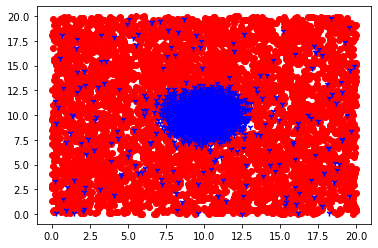

In [4]:
### Problem 2
mean = (10,10)
cov = [[2,0],[0,2]]
#Generate 5000 points with gaussian (normal) distribution around 10,10 with covariance [2,0], [0,2].
gaussian = np.random.multivariate_normal(mean, cov, 5000)

# generate random points
x_arr = np.random.uniform(low=0.0, high=20.0, size=5200)
y_arr = np.random.uniform(low=0.0, high=20.0, size=5200)
plt.scatter(x_arr, y_arr,marker = 'o',color = 'orange')
x_cord = np.random.normal(loc = 10.0, scale = 1, size = 5000)
y_cord = np.random.normal(loc = 10.0, scale = 1, size = 5000)
plt.scatter(x_cord,y_cord,marker = '1',color = 'blue')
x_cord1= np.random.uniform(low=0.0, high=20.0, size=200)
y_cord1 = np.random.uniform(low=0.0, high=20.0, size=200)
plt.scatter(x_cord1,y_cord1,marker = '1',color = 'blue')

plt.show()

**(b) Randomly select 10% of the data as test dataset and the remaining 90% of the data as training dataset. Train decision trees by increasing the number of nodes of the decision trees until the training error becomes 0. Plot the training errors and the testing errors under different numbers of nodes and explain the model underfitting and model overfitting.**

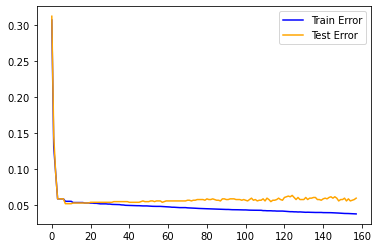

In [12]:
# Codes for P2-2(b)
# random x and y data from gaussian
x_data = np.append(x_cord, x_cord1)
x_data = np.append(x_data, x_arr)
y_data = np.append(y_cord, y_cord1)
y_data = np.append(y_data, y_arr)

# Initializing all empty arrays to be appended or changed later
rand_arr = random.sample(range(10400), 1040) # 1040 random values. 10% of data
test_set=[]
x_train=[0]*9360 # 90% of data
y_train=[0]*9360
train_results = [] # classification results
test_results = [0]*1040
full_train = []

# 10% of data
for i in range(0,1040):
    test_set.append([x_data[rand_arr[i]],y_data[rand_arr[i]]])
    if(rand_arr[i] > 5200):
        test_results[i] = 1
    else:
        test_results[i] = 0

counter = 0
for i in range(0, 10400):
    if i not in rand_arr: # classification of rand val
        x_train[counter] = x_data[i]
        y_train[counter] = y_data[i]
        counter += 1
        if(i > 5200):
            train_results.append(1)
        else:
            train_results.append(0)
            
# with 90% of data, append x, y pair to master array
for i in range(0, 9360):
    full_train.append([x_train[i], y_train[i]])

# initialize empty arrays for results
predict_train_results = []
predict_test_results = []


for i in range(2, 160):
    model_0 = DecisionTreeClassifier(max_leaf_nodes = i)
    model_0.fit(full_train,train_results) 
    temp1 = (model_0.predict(full_train))
    temp2 = (model_0.predict(test_set))
    real_train_results = accuracy_score(temp1, train_results)
    real_test_results = accuracy_score(temp2, test_results)
    predict_train_results.append(1 - real_train_results)
    predict_test_results.append(1 - real_test_results)
plt.plot(predict_train_results, color = 'blue', label="Train Error")
plt.plot(predict_test_results, color = 'orange', label="Test Error")
plt.legend()

Model underfitting is when the model performs poorly on the training dat. In our case, as number of nodes increases we overfit the data which leads to higher error rate. The model is overfit when training is correct but testing results is poor.

# **P2-3. Text Documents Classification**

**(a) Load the following 4 categories from the 20 newsgroups dataset: categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']. Print the number of documents in the training dataset and the test dataset. Print the number of attributes in the training dataset.**

In [6]:
# Codes for P2-3(a)
categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']
trainer = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
tester = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))
print(f"# Documents in Training: {len(trainer.filenames)}")
print(f"# Documents in Testing: {len(tester.filenames)}")
print(f"# Attributes in Training: {len(tester.target_names)}")

Number of Documents in training dataset: 2148
Number of Documents in testing dataset: 1430
Number of Attributes in training dataset: 4


In [13]:
# Codes for P2-3(b)
vectorizer = TfidfVectorizer()
xTrain = vectorizer.fit_transform(news_train.data)
xTest = vectorizer.transform(news_test.data)
clf = DecisionTreeClassifier()
clf.fit(xTrain, news_train.target)
# accuracy
ypred = clf.predict(xTest)
rounded_score = round(clf.score(xTest, news_test.target), 5)

# confusion matrix
print(confusion_matrix(news_test.target, ypred))
print("Accuracy:", rounded_score)

splitter = ['best', 'random']
max_depth = [2,3,4,6,8]
min_samples_split = range(1,10)
min_samples_leaf = range(1,5)

# using grid search cv to test combinations. more efficient than brute force. No time to change in other code. 
parameters = {"max_depth":max_depth, "min_samples_split":min_samples_split, "min_samples_leaf":min_samples_leaf, "splitter":splitter}
grid = GridSearchCV(clf, param_grid=parameters, cv=5, verbose=1, n_jobs=-1)
grid.fit(xTrain, news_train.target)

# Printing best parameters
print("Optimal Parameters:", grid.best_params_)
print(grid.best_estimator_)

### DO NOT PRINT BECAUSE OF SIZE ###
# plot_tree(clf, filled=True)
# plt.show()

[[252  47  63  27]
 [ 56 253  46  41]
 [ 50  62 244  38]
 [ 34  49  39 129]]
Accuracy: 0.61399
Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 920 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:   24.5s finished


Optimal Parameters: {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 7, 'splitter': 'best'}
DecisionTreeClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=7)
